##**Task 1       The Spark Foundations  (Grip November 21)**




#**Predicting using supervised ML** 
#**Predicit the percentage of an student based on the study hours** 
#**Domian: Data Science and Business Analytics**
# **Author :Ahmed Naser Shebl**

Data set : http://bit.ly/w-data

In [84]:
# Importing all libraries required in this notebook
# Uploading the Data 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
st_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
st_data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Understading and assessing the data checking that data is clean and ready** 

In [85]:
st_data.shape

(25, 2)

In [86]:
st_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [87]:
st_data.duplicated().sum() 

0

In [88]:
st_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [89]:
st_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [90]:
st_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Now we are ready to plot scores data and check the distribution**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd8cc5990>,
      dtype=object)

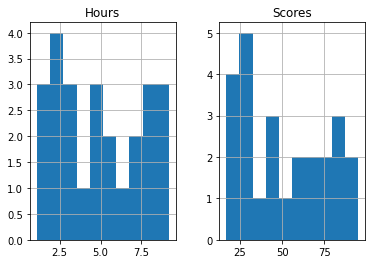

In [91]:
st_data.hist()

In [92]:
st_data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd8ba2050>,
      dtype=object)

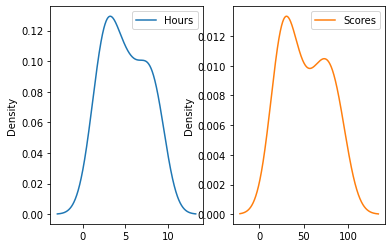

In [93]:
st_data.plot(kind='density', subplots= True , sharex=False ,sharey= False, layout=(1,2))

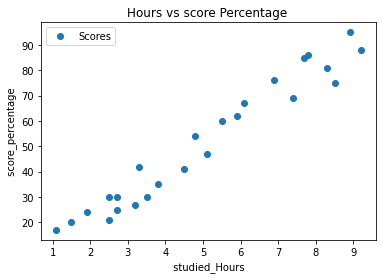

In [94]:
st_data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs score Percentage ")
plt.xlabel(" studied_Hours ")
plt.ylabel(" score_percentage ")
plt.show()

**as we see the graph gives there is a clear and highly positive regression between hours and scores**

In [95]:
corr = st_data.corr() # 
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


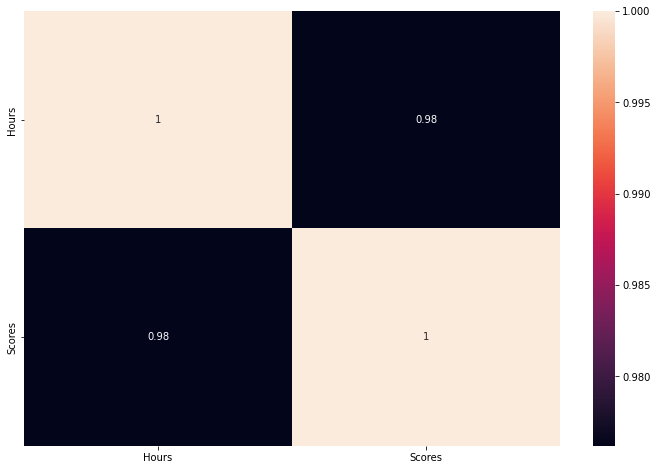

In [96]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

**Preparing data & Spilting the data and Training the model:** 

In [97]:
x = st_data.iloc[:, :-1].values
y = st_data.iloc[:, 1].values

In [98]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) 


In [99]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


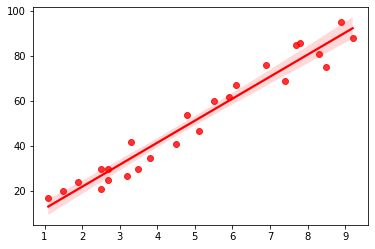

In [100]:
sns.regplot(x, y, data=st_data, color='red')


In [101]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [102]:
y_pred = regressor.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [103]:
n_df=pd.DataFrame({'actual_values': y_test , ' Predictions': y_pred})
n_df.head()

,actual_values,Predictions
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106


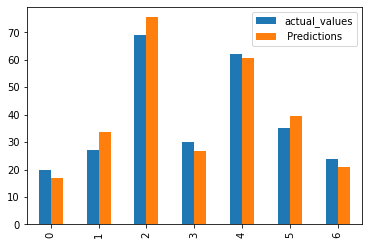

In [104]:
n_df.plot(kind="bar")
plt.show()

**Evaluating Algorithm :**



In [105]:
from sklearn import metrics
print("R2 : ",metrics.r2_score(y_test,y_pred))
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred))
print('MSE :' , metrics.mean_squared_error(y_test,y_pred))

R2 :  0.9367661043365056
MAE :  4.130879918502482
MSE : 20.33292367497996


**What will be the prediction if a student studies 9.25 hours/day** ?

In [106]:
studied_hours = [[9.25]]
score_pred = regressor.predict(studied_hours)
print("Hours/day = {}".format(studied_hours))
print("Predicted_Score = {}".format(score_pred[0]))

Hours/day = [[9.25]]
Predicted_Score = 93.89272889341652
